In [2]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Speed Dating Data.csv', encoding='ISO-8859-1')

In [4]:
df.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1,0,1,1,1,10,7,NaN,4,...,5,7,7,7,7,NaN,NaN,NaN,NaN,NaN
1,1,1,0,1,1,1,10,7,NaN,3,...,5,7,7,7,7,NaN,NaN,NaN,NaN,NaN
2,1,1,0,1,1,1,10,7,NaN,10,...,5,7,7,7,7,NaN,NaN,NaN,NaN,NaN
3,1,1,0,1,1,1,10,7,NaN,5,...,5,7,7,7,7,NaN,NaN,NaN,NaN,NaN
4,1,1,0,1,1,1,10,7,NaN,7,...,5,7,7,7,7,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(8378, 195)

In [6]:
df, df_labels = df.drop(['match'], axis = 1), df['match']

In [7]:
df_labels.shape

(8378,)

# Cleaning Data

In [8]:
na_sum = list(df.isnull().sum())
na_col = list(df.isnull().sum().index)

print(len(na_sum))
print(len(na_col))

194
194


In [9]:
drop_col=[]
for i in range(len(na_sum)):
    if na_sum[i]>2523:
        drop_col.append(na_col[i])
        
print('We can drop', len(drop_col), 'columns')

We can drop 83 columns


In [10]:
df = df.drop(drop_col, axis=1)
df.shape

(8378, 111)

In [11]:
df = df.fillna(df.mean())

In [12]:
df.isnull().values.any()

True

In [13]:
na_sum = list(df.isnull().sum())
na_col = list(df.isnull().sum().index)

nan_col = []

for i in range(len(na_sum)):
    if na_sum[i] > 0:
        nan_col.append(na_col[i])
        
nan_col

['field', 'from', 'zipcode', 'career']

In [14]:
df = df.drop(nan_col, axis=1)

In [15]:
df.shape

(8378, 107)

In [16]:
df.isnull().values.any()

False

# Normalizing data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X = StandardScaler().fit_transform(df)

In [19]:
X.shape

(8378, 107)

In [20]:
from sklearn.decomposition import PCA

pca_full = PCA(n_components=None)
pca_full.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

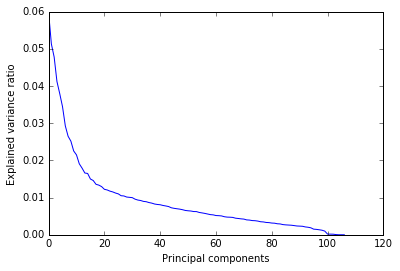

In [21]:
plt.plot(range(0,107), pca_full.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
#plt.xticks(np.arange(0,100,5))
plt.show()

In [22]:
import tensorflow as tf

In [23]:
x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=80)
x_pca = pca.fit_transform(x_scaled)

#print(x_pca, end = '\n\n')
#print(pca.explained_variance_ratio_)

In [24]:
sum(pca.explained_variance_ratio_)

0.95441691683305407

In [25]:
from sklearn import metrics


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_pca, df_labels, test_size = 0.2, random_state=0)

In [27]:
X_test.shape

(1676, 80)

In [28]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

classifier = tf.contrib.learn.LinearClassifier(feature_columns=feature_columns, n_classes=2)

classifier.fit(X_train, Y_train, steps = 300)
predictions = list(classifier.predict(X_test, as_iterable=True))
score1 = metrics.accuracy_score(Y_test, predictions)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_task_id': 0, '_evaluation_master': '', '_tf_random_seed': None, '_task_type': None, '_save_checkpoints_secs': 600, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x119d03fd0>, '_keep_checkpoint_max': 5, '_environment': 'local'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/x7/3dvbv92j7k7f68w24zm44flw0000gn/T/tmpe6b2ps1u/model.ckpt.
INFO:tensorflow:step = 1, loss = 0.693156
INFO:tensorflow:global_step/sec: 7.71832
INFO:tensorflow:step = 101, loss = 0.10983
INFO:tensorflow:global_step/sec: 8.30859
INFO:tensorflow:step = 201, loss = 0.0675056
INFO:tensorflow:Saving checkpoints for 300 into /var/folders/x7/3dvbv92j7k7f68w24zm44flw0000gn/T/tmpe6b2ps1u/model.ckpt.
INFO:tensorflow:Loss for final step: 0.0492441.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


In [29]:
print('TF Accuracy :',  score1)

TF Accuracy : 1.0


In [30]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[30], n_classes=2)

classifier.fit(X_train, Y_train, steps = 300)
predictions = list(classifier.predict(X_test, as_iterable=True))
score = metrics.accuracy_score(Y_test, predictions)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_task_id': 0, '_evaluation_master': '', '_tf_random_seed': None, '_task_type': None, '_save_checkpoints_secs': 600, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10c4cca90>, '_keep_checkpoint_max': 5, '_environment': 'local'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py:247: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/x7/3dvbv92j7k7f68w24zm44flw0000gn/T/tmpwkwis96e/model.ckpt.
INFO:tensorflow:step = 1, loss = 0.647171
INFO:tensorflow:global_step/sec: 7.57518
INFO:tensorflow:step = 101, loss = 0.14559
INFO:tensorflow:global_step/sec: 7.97104
INFO:tensorflow:step = 201, loss = 0.0482042
INFO:tensorflow:Saving checkpoints for 300 into /var/folders/x7/3dvbv92j7k7f68w24zm44flw0000gn/T/tmpwkwis96e/model.ckpt.
INFO:tensorflow:Loss for final step: 0.0224024.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))


In [31]:
print('TF Accuracy :',  score)

TF Accuracy : 0.998806682578


In [32]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)

In [33]:
accuracy = metrics.accuracy_score(Y_test, y_pred)

In [34]:
print("SVM accuracy :", accuracy)

SVM accuracy : 0.994630071599


In [35]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train, Y_train)
y_pred1 = MLP.predict(X_test)
acc = metrics.accuracy_score(Y_test, y_pred1)
print(acc)

1.0


In [36]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()
Ada.fit(X_train, Y_train)
y_pred1 = Ada.predict(X_test)
acc = metrics.accuracy_score(Y_test, y_pred1)
print(acc)

0.933770883055


In [37]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, Y_train)
y_prd = log.predict(X_test)
acc = metrics.accuracy_score(Y_test, y_prd)
print(acc)

1.0


# Creating my Neural network

In [38]:
num_examples = len(X_train)
nn_input_dim = 80 
nn_output_dim = 2

epsilon = 0.01
reg_lambda = 0.01

#The loss function

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    #forward propagation
    z1 = X_train.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), Y_train])
    data_loss = np.sum(corect_logprobs)
  
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss


def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)


# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    print (W1)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X_train.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), Y_train] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X_train.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print ("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model



    

In [42]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

#Plot the decision boundary


[[ 0.19722705  0.04473894  0.10942623]
 [ 0.25053948  0.20879933 -0.10926299]
 [ 0.10622311 -0.01692225 -0.01154022]
 [ 0.04590631  0.01610456  0.16259272]
 [ 0.0850866   0.01360368  0.04962542]
 [ 0.03730592  0.16704312 -0.02293739]
 [ 0.03500203 -0.09549081 -0.28543294]
 [ 0.07307678  0.09664691 -0.08297657]
 [ 0.25376628 -0.16260303  0.00511596]
 [-0.02092779  0.17136993  0.1642793 ]
 [ 0.01732365  0.04227986 -0.09925746]
 [-0.22145978 -0.03889776  0.01748035]
 [ 0.13755068  0.13443015 -0.04330445]
 [-0.03379848 -0.11723179 -0.15876283]
 [-0.19076681  0.21810332 -0.05698085]
 [-0.0489782  -0.14006678  0.08692606]
 [-0.18043926 -0.02378509 -0.10011621]
 [ 0.04325701 -0.05710975 -0.13199869]
 [-0.00315087  0.04788896  0.00743685]
 [ 0.03381739 -0.07091937 -0.0405557 ]
 [-0.07518336 -0.04019927 -0.09091252]
 [-0.19300426  0.01983685 -0.04492047]
 [-0.18226172  0.05174063 -0.10143904]
 [ 0.00580767  0.0815148   0.01442073]
 [ 0.12738887 -0.13805772  0.04498316]
 [-0.0765641  -0.09735808

In [43]:
z = predict(model, X_test)

In [44]:
metrics.accuracy_score(Y_test, z)

0.99701670644391405

In [45]:
X_train[:,40:80].shape

(6702, 40)

In [46]:
#plotting the decision boundary
def plot_decision_boundary(pred_func):
    x_min, x_max = X_train[:, 0:40].min() - .5, X_train[:,0:40].max() + .05
    y_min, y_max = X_train[:, 0:40].min() - .5, X_train[:, 40:80].max() + .05
    h = .01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contourf(xx,yy, z, cmap=plt.cm.Spectral)
    plt.scatter(X_train[:, 0:40], X_train[:, 40:80], c = X_train, cmap=plt.cm.Spectral)

In [47]:
Y_train.shape

(6702,)

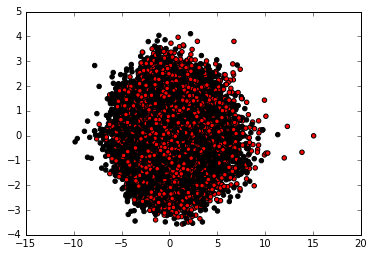

In [48]:
plt.scatter(X_train[:, 0:40], X_train[:, 40:80], c = ('k', 'r'), cmap=plt.cm.Spectral)